<h2>Mode scan for FP</h2>

In [2]:
from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy.signal                
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)

                                              ..-
    PyKat 1.2.81          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [7]:
base1 = """

l i1 1 0 0 n0                 

tem i1 0 0 1 0                
tem i1 1 0 1 0                 
#tem i1 2 0 1 0              
#tem i1 3 0 1 0                 


s sNs 1 n0 n1              


m itm1 0 1 0 n1 n2     
s s1 .037 1.44963 n2 n3
m2 itm2 0.99 50u 0 n3 n4      
        

s cav 9.1 n4 n5       


m2 etm1 0.998 50u 0 n5 n6

attr etm1 Rc 31               


ad ad0 0 0 0 n6           
ad ad1 1 0 0 n6                       


pd pd_out n6

cav NC itm2 n4 etm1 n5     
maxtem 1                      

xaxis i1 f lin -30M 30M 10000  

put ad0 f $x1              #ad detector set frequency            
put ad1 f $x1             
            



yaxis log abs

"""

Parsing `tem i1 0 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem i1 1 0 1 0` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2021-07-08 15:49:51.201031


100% | ETA:  0:00:00 | Calculating                                             

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 0.390157 seconds

--- Output info ---

Run date and time: 2021-07-08 15:49:51.203022
Detectors used: ad0, ad1, pd_out

One xaxis used: ['xaxis i1 f lin -30000000 30000000 10000', 'put ad0 f $x1', 'put ad1 f $x1']
ad0    : min = 1.562033873020370e-03 max = 5.184184284685061e-01
ad1    : min = 1.562033873587720e-03 max = 5.184157105668890e-01
pd_out : min = 5.302774289948860e-06 max = 2.687659787111180e-01
6738000.0


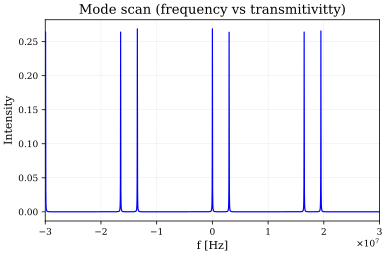

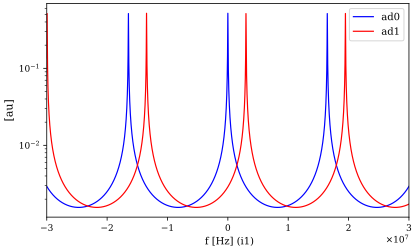

In [8]:
basekat = finesse.kat() 
basekat.verbose = 1
basekat.parse(base1)

out = basekat.run()
out.info()
plt.plot(out.x,out['pd_out'])
plt.ylabel("Intensity")
plt.xlabel("f [Hz]")
plt.title("Mode scan (frequency vs transmitivitty)")

indexes = scipy.signal.find_peaks_cwt(out['pd_out'], np.ones_like(out['pd_out']))
FSR = out.x[indexes][2] - out.x[indexes][1]
print(FSR)


out.plot(['ad0','ad1'])